ㆍ신경망의 구조
ㆍ딥러닝의 구성 단위 / 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
ㆍ대부분의 경우 가중치라는 층의 상태를 가짐
ㆍ층마다 적절한 텐서 포맷과 데이터 처리방식이 다름
ㆍ(samples, features) 크기의 2D텐서가 저장된 간단한 벡터 데이터는 완전 연결층이나 밀집층이라고도 불리는 밀집연결층에 의해 처리되는 경우가 많음
ㆍ(samples, timesteps, features)크기의 3D텐서로 저장된 시퀀스 데이터는 보통 LSTM같은 순환층에 의해 처리
ㆍ4D텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D 합성곱 층에 의해 처리

ㆍLayer : 딥러닝의 레고 블록처럼 생각할 수 있음
ㆍ호환 가능한 층들을 엮어 데이터 변환 파이프라인(pipeline)을 구성하여 딥러닝 모델을 만듬
ㆍ층 호환성(layer compatibility) - 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력텐서를 반환한다는 사실을 말함.
ㆍ첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층. 이 층은 첫 번째 차원 크기가 32로 변환된 텐서를 출력
ㆍ32차원의 벡터를 입력으로 받는 하위층이 연결되어야함.
ㆍ케라스에서는 모델에 추가된 층을 자동으로 상위 층의 크기에 맞추어 주기 때문에 호환성을 걱정할 필요가 없음.

ㆍModel : 층의 네트워크
ㆍ딥러닝 모델은 층으로 만든 비순환 유향 그래프(Directed Acyclic Graph, DAG)
ㆍ하나의 입력을 하나의출력으로 매핑하는 층을 순서대로 쌓는 것(가장 일반적인 예)
ㆍ머신러닝 : 가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것
ㆍ딱 맞는 네트워크 구조를 찾아내는 것은 과학보다 예술에 가까움

ㆍLoss Function and Optimizer 
ㆍ손실함수(loss function) - 목적함수(objective function) - 훈련하는 동안 최소화 될 값 : 주어진 문제에 대한 성공지표
ㆍ옵티마이저(optimizer) : 손실함수를 기반으로 네트워크가 어떻게 업데이트 될지 결정 / 특정 종류의 확률적 경사 하강법(SGD)을 구현
ㆍ문제에 맞는 올바른 목적함수를 선택하는 것이 매우 중요 : 네트워크가 손실을 최소화하기 위해 편법을 사용할 수 있음
ㆍ예) 모든 인류의 평균 행복지수를 최대화하기 / 평균보다 낮은 값을 제거해버리는 방법같은 편법
ㆍ분류, 회귀, 시퀀스 예측 같은 일반적인 문제에서는 올바른 손실함수를 선택하는 간단한 지침이 존재

In [65]:
# 모델은 Sequential 모델 또는 함수형 API를 사용
# 모델구조가 정의된 후에는 Sequential모델을 사용했는지 API를 사용했는지는 상관이 없음.
from tensorflow.keras.datasets import imdb
# 가장 많이 등장하는 10000개의 단어만 사용하겠다는 의미
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000) 
print(train_data[0])
print(train_labels[0])
print(max([max(sequence) for sequence in train_data]))
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999
? this film was just brilliant casting location scene

In [66]:
# 정수 시퀀스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(seqs, dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1. # 특정 인덱스의 위치를 1.으로 만듬
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


In [67]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [68]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
from tensorflow.keras import optimizers
model.compile(optimizer = optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_crossentropy])

In [69]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [64]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs = 50, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/50
30/30 [==============================] - 2s 36ms/step - loss: 0.0430 - acc: 0.9447 - val_loss: 0.0448 - val_acc: 0.9432
Epoch 2/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0324 - acc: 0.9630 - val_loss: 0.0448 - val_acc: 0.9412
Epoch 3/50
30/30 [==============================] - 1s 22ms/step - loss: 0.0274 - acc: 0.9715 - val_loss: 0.0539 - val_acc: 0.9296
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0237 - acc: 0.9761 - val_loss: 0.0523 - val_acc: 0.9291
Epoch 5/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0186 - acc: 0.9831 - val_loss: 0.0564 - val_acc: 0.9248
Epoch 6/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0167 - acc: 0.9850 - val_loss: 0.0614 - val_acc: 0.9194
Epoch 7/50
30/30 [==============================] - 1s 19ms/step - loss: 0.0133 - acc: 0.9891 - val_loss: 0.0627 - val_acc: 0.9162
Epoch 8/50
30/30 [==============================] - 1s 22ms/step - loss: 0.0117 - a

In [70]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

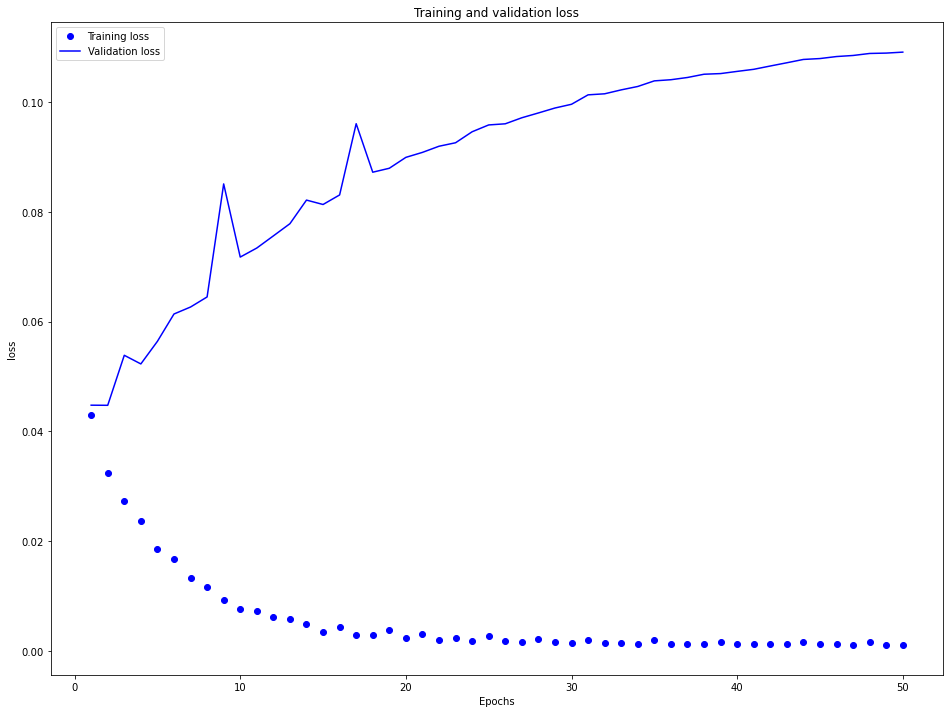

In [71]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)
plt.figure(figsize = (16, 12))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

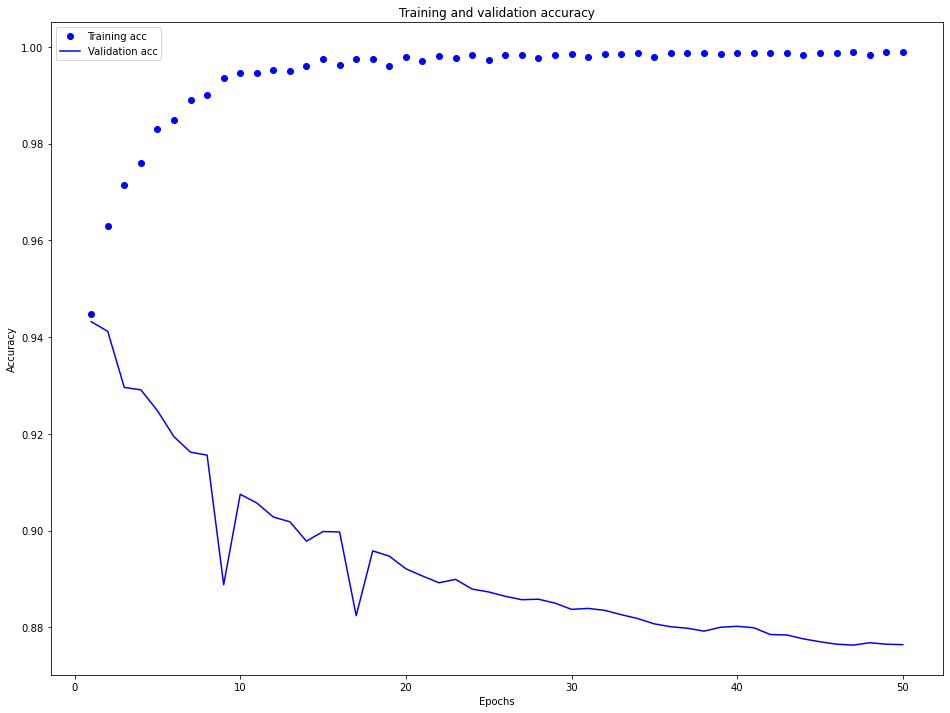

In [72]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure(figsize = (16, 12))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 4, batch_size = 512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.4689 - accuracy: 0.8158
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2679 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2033 - accuracy: 0.9278
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2951 - accuracy: 0.8841
[0.2951335608959198, 0.8840799927711487]


In [74]:
model.predict(x_test)

array([[0.13993523],
       [0.9997541 ],
       [0.70952225],
       ...,
       [0.08780906],
       [0.06107238],
       [0.50127554]], dtype=float32)